<a href="https://colab.research.google.com/github/AlanMarquesRocha/segmentacao_imagens_pdi/blob/master/segmentacao_imagens_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Segmentação baseada em ``LIMIARIZAÇÃO``**

#### O objetivo desse notebook é abordar técnicas clássicas de limiarização (binarização) de imagens em níveis de cinza utilizando ``Python`` e ``OpenCV``.

#### O conteúdo deste notebook está dividido de acordo com o sumário abaixo:
---

## **Sumário**

- [x] Importação das bibliotecas necessárias para o projeto.
- [x] Limiarização global (threshold ou binarização) com limiar aleatório
- [x] Processo de limiarização ou binarização
- [x] Tipos de limiarização (Binarização) com ``OpenCV``
-- ``THRESH_BINARY``
-- ``THRESH_BINARY_INV``
-- ``THRESH_TOZERO``
-- ``THRESH_TOZERO_INV``
-- ``THRESH_TRUNC``
- [X] Resultados obtidos
- [x] Exemplo de limiarização em uma imagem de tomografia computadorizada
- [x] Melhorando o processo com o Método de ``OTSU
``
- [x] Melhorando a segmentação em uma imagem com ruído (sal e pimenta)
- [x] Limiarização adaptativa

---

#### No próximo notebook serão abordadas as ``operações morfológicas``. Essas técnicas são a base do processo de segmentação de imagens, fazendo parte do capítulo de ``Segmentação com abordagens clássicas`` 

#### O conteúdo do notebook relacionado às operações morfológicas pode ser acessado [*(aqui)*](https://)

### **Importando as bibliotecas necessárias para o projeto:**

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
# realizando a ligação do google drive com o notebook. 
# Esse comando permite acessar os arquivos disponíveis no google drive.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Realiza a cópia de uma pasta específica do drive no ambiente colab:
# O comando abaixo realiza uma cópia das imagens que serão utilizadas no projeto.
!cp -R /content/gdrive/MyDrive/cursos/segmentacao_imagens_ia_expert_academy/imagens/imagens imagens/

### **Limiarização global (threshold ou binarização) com limiar aleatório**

De forma simples a limiarização de uma imagem realiza a aplicação de um limiar ($k$), onde para os píxels no intervalo $0 < k$, teremos seus valores substituídos por 0 e para o intervalo de píxels $k > 255$, teremos seus valores substituídos por 255.

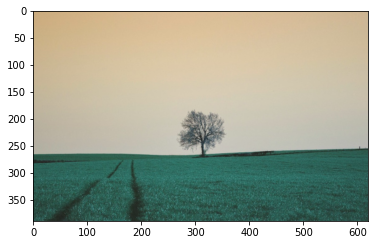

In [5]:
# abertura da imagem.
img = cv2.imread('/content/imagens/paisagem01.jpg')

# Plotagem da imagem. Existe uma diferença entre os canais Red (R) e Blue (B) da imagem. 
# É necessário realizar a conversão de BGR para RGB
plt.imshow(img);

As dimensões da imagem em RGB são:  (389, 620, 3)


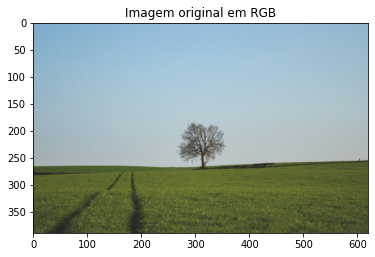

In [6]:
# Realizando a conversão de BGR para RGB com OpenCV
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrando a imagem com os canais corrigidos:
plt.title('Imagem original em RGB')
plt.imshow(img_rgb);

print('As dimensões da imagem em RGB são: ', img_rgb.shape)

### **Processo de limiarização ou binarização**

Antes de iniciar o processo de limiarização, se faz necessário realizar a conversão dos canais RGB para níveis de cinza, ou seja, a imagem que antes era representada por três canais $(r, g, b)$, agora passará a ser representada apenas por dois $(x, y)$.

As dimensões da imagem passaram a ser:  (389, 620)


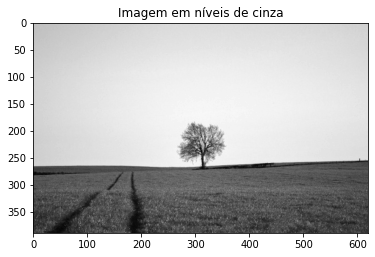

In [7]:
# Utiliza a função cvtCOLOR e o parâmetro COLOR_RGB2GRAY da biblioteca OpenCV para realizar
# a conversão da imagem para níveis de cinza.
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

plt.title('Imagem em níveis de cinza')
plt.imshow(img_gray, cmap='gray');

print('As dimensões da imagem passaram a ser: ', img_gray.shape)

In [8]:
# variável de limiarização (podendo variar de 0 a 255):
k = 136 #@param {type: "slider", min:0, max: 255, set:1}
# realiza a binarização da imagem.
val, img_thresh = cv2.threshold(img_gray, k, 255, cv2.THRESH_BINARY)

print('O valor defeinido como limiar foi:', val)

O valor defeinido como limiar foi: 136.0


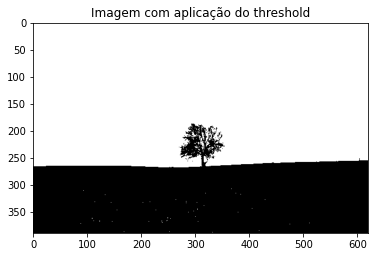

In [9]:
# resultado a imagem binarizada de acordo com a definição do limiar
plt.title('Imagem com aplicação do threshold')
plt.imshow(img_thresh, cmap='gray');


In [10]:
# criando uma função simples para mostrar as imagens 
def show_img(imagem, x, y, titulo):
  fig = plt.gcf()
  fig.set_size_inches(x, y)
  plt.title(titulo)
  plt.imshow(imagem, cmap='gray')

**Salvando o resultado obtido no diretório**

In [ ]:
cv2.imwrite('img_thresh.jpg', img_thresh)

True

## **Tipos de limiarização (Binarização) com ``OpenCV``**

Nesta seção serão abordados outros tipos de limiarização comumente utilizadas na segmentação de imagens.

**Os resultados de cada método serão ilustrados ao fim dessa seção.**

### **THRESH_BINARY**

O método ``THRESH_BINARY`` já foi abordado anteriormente. O limiar $k$ será utilizado como padrão da binzarização.

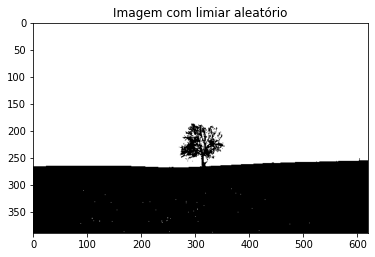

In [ ]:
show_img(img_thresh, 6, 4, 'Imagem com limiar aleatório')

### **THRESH_BINARY_INV**

O ``THRESH_BINARY_INV`` como seu nome sugere, faz o oposto do ``THRESH_BINARY`` ou seja, para um limiar $k$, teremos a conversão dos seus píxels de tal forma que no intervalo $0 - k$, teremos $p = 255$ e $k - 255$, teremos $p = 0$.

Em outras palavras os valores acima de $k$ ficarão pretos e os valores abaixo de $k$ ficarão brancos.

In [ ]:
# implementação do THRESH_BINARY_INV

# k = limiar (variando de 0 - 255) 
k = 136 #@param {type: "slider", min:0, max: 255, set:1}
_, img_inv = cv2.threshold(img_gray, k, 255, cv2.THRESH_BINARY_INV)

### **THRESH_TOZERO**

No ``THRESH_TOZERO`` todos os valores de píxels que estão abaixo do limiar $k$ terão valores iguais a 0, ou seja, ficarão pretos. E todos os pixels com valores maiores ou iguais a $k$ permanecerão com seus valores originais da imagem em niveis de cinza.

In [ ]:
# implementação do THRESH_TOZERO

# k = limiar (variando de 0 - 255) 
k = 136 #@param {type: "slider", min:0, max: 255, set:1}
_, img_tozero = cv2.threshold(img_gray, k, 255, cv2.THRESH_TOZERO)

### **THRESH_TOZERO_INV**

O ``THRESH_TOZERO_INV`` é o contrário do ``THRESH_TOZERO``. todos os valores de píxels que estão abaixo do limiar $k$ permanecerão com seus valores originais da imagem em niveis de cinza e todos os píxels com valores iguais ou acima de $k$ terão valores iguais a 0, ou seja, ficarão pretos.

In [ ]:
# implementação do THRESH_TOZERO_INV

# k = limiar (variando de 0 - 255) 
k = 136 #@param {type: "slider", min:0, max: 255, set:1}
_, img_z_inv = cv2.threshold(img_gray, k, 255, cv2.THRESH_TOZERO_INV)

### **THRESH_TRUNC**

In [ ]:
# implementação do THRESH_TRUNC

# k = limiar (variando de 0 - 255) 
k = 136 #@param {type: "slider", min:0, max: 255, set:1}
_, img_trunc = cv2.threshold(img_gray, k, 255, cv2.THRESH_TRUNC)

## **Resultados obtidos**

Nesta seção serão apresentados os resultados de cada técnica implementada anteriormente.*texto em itálico*

In [11]:
# Função para plotagem de múltiplas imagens:
def showMultipleImages(imgsArray, titlesArray, size, x, y, mincolor = 0, maxcolor = 255):
    if(x < 1 or y < 1):
        print("ERRO: X e Y não podem ser zero ou abaixo de zero!")
        return
    elif(x == 1):
        fig, axis = plt.subplots(y, figsize = size)
        yId = 0
        for img in imgsArray:
            axis[yId].imshow(img, cmap = 'gray', vmin = mincolor, vmax = maxcolor);
            axis[yId].set_anchor('NW')
            axis[yId].set_title(titlesArray[yId], fontdict = {'fontsize': 12, 'fontweight': 'medium'}, pad = 5)

            yId += 1
    elif(y == 1):
        fig, axis = plt.subplots(1, x, figsize = size)
        fig.suptitle(titlesArray)
        xId = 0
        for img in imgsArray:
            axis[xId].imshow(img, cmap = 'gray', vmin = mincolor, vmax = maxcolor)
            axis[xId].set_anchor('NW')
            axis[xId].set_title(titlesArray[xId], fontdict = {'fontsize': 12, 'fontweight': 'medium'}, pad = 5)

            xId += 1
    else:
        fig, axis = plt.subplots(y, x, figsize = size);
        xId, yId, titleId = 0, 0, 0
        for img in imgsArray:
            axis[yId, xId].set_title(titlesArray[titleId], fontdict = {'fontsize': 12, 'fontweight': 'medium'}, pad = 5)
            axis[yId, xId].set_anchor('NW')
            axis[yId, xId].imshow(img, cmap = 'gray', vmin = mincolor, vmax = maxcolor)
            if(len(titlesArray[titleId]) == 0):
                axis[yId, xId].axis('off')

            titleId += 1
            xId += 1
            if xId == x:
                xId = 0
                yId += 1
    plt.show();

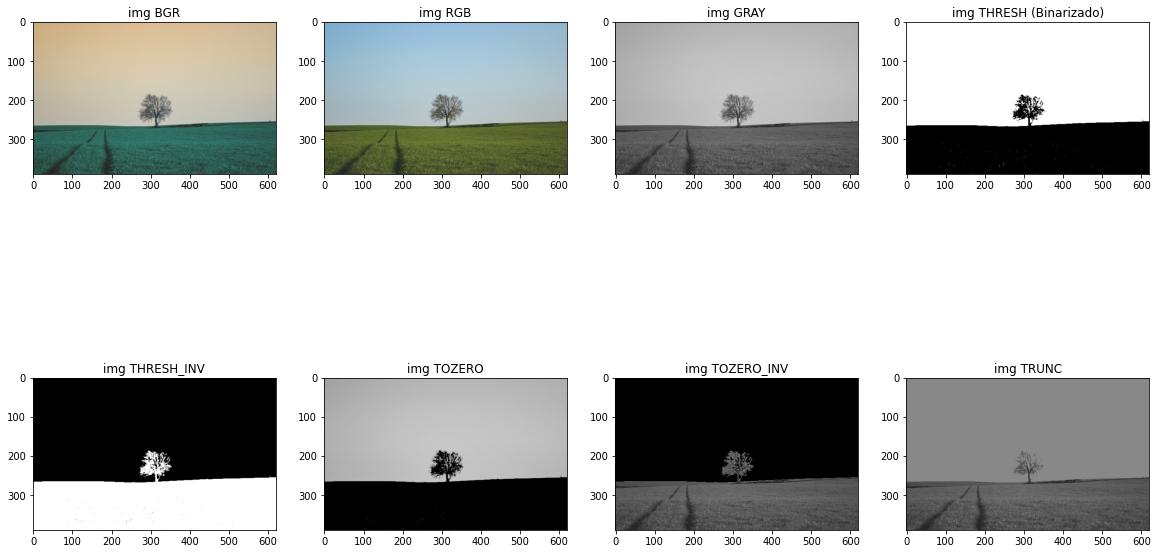

In [ ]:
imgsArray = [img, img_rgb, img_gray, img_thresh, img_inv, img_tozero, img_z_inv, img_trunc]

titlesArray = ['img BGR', 'img RGB', 'img GRAY', 'img THRESH (Binarizado)', 'img THRESH_INV', 'img TOZERO', 'img TOZERO_INV', 'img TRUNC']

showMultipleImages(imgsArray, titlesArray, (20, 12), 4, 2)

## **Exemplo de limiarização em uma imagem de tomografia computadorizada**

In [20]:
# Função para realizar o processo de limiarização com os métodos já conhecidos:
def thresh_image(imagem, k):
  img2 = imagem
  _, img_bin = cv2.threshold(imagem, k, 255, cv2.THRESH_BINARY)
  _, img_bin_inv = cv2.threshold(imagem, k, 255, cv2.THRESH_BINARY_INV)
  _, img_tozero = cv2.threshold(imagem, k, 255, cv2.THRESH_TOZERO)
  _, img_tozero_inv = cv2.threshold(imagem, k, 255, cv2.THRESH_TOZERO_INV)
  _, img_trunc = cv2.threshold(imagem, k, 255, cv2.THRESH_TRUNC)
  
  # mostrando os resultados
  imgsArray = [img2, img_bin, img_bin_inv, img_tozero, img_tozero_inv, img_trunc]
  titlesArray = ['Original', 'Threshold', 'Threshold_Inv', 'Tozero', 'Tozero_inv', 'trunc']
  showMultipleImages(imgsArray, titlesArray, (12, 8), 3, 2)

  return showMultipleImages

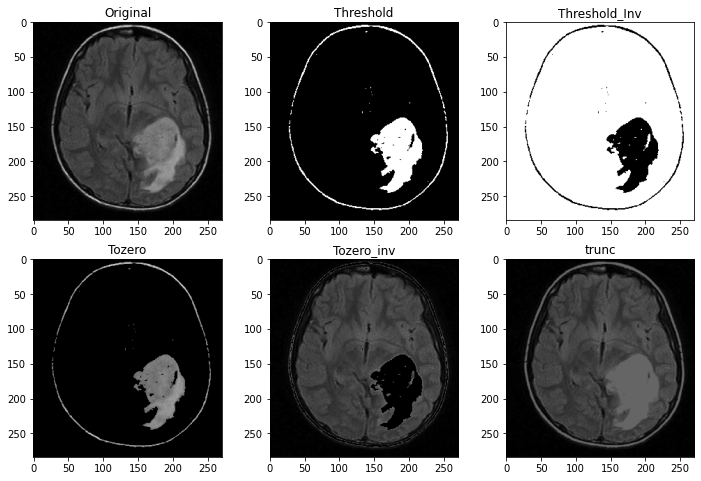

<function __main__.showMultipleImages(imgsArray, titlesArray, size, x, y, mincolor=0, maxcolor=255)>

In [21]:
# abrindo a imagem de tomografia computadorizada:
img_2 = cv2.imread('/content/imagens/ct-scan.jpg')

# convertendo a imagem para níveis de cinza:
img2_gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

# chamando a função thresh_image para realizar o processo de limiarização, onde k = a definição do limiar.
thresh_image(img2_gray, 101)

## **Método de Otsu ($Otsu's Method$) para limiarização de imagens**

### O método de ``Otsu`` gera um histogama da imagem de entrada e atribui um valor de limiar máximo ($max$) e mínimo ($min$) de acordo com a distribuição dos pixels do histograma, oferecendo um valor de limiar ideal para o processo de binarização da imagem.

### Mais detalhes podem ser obtidos no seguinte [link](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)

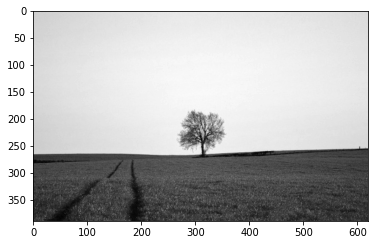

In [26]:
img = cv2.imread('/content/imagens/paisagem01.jpg')

# realizando a correção dos canais BGR para RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# realizando a conversão da imagem para níveis de cinza
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap='gray')

Valor do limiar Otsu:  136.0


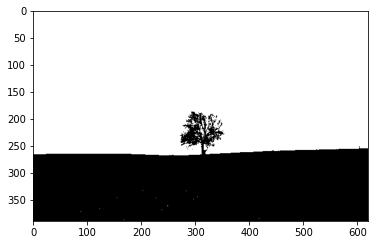

In [28]:
# processo de limiarização pelo método de Otsu
k, img_otsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

print('Valor do limiar Otsu: ', k)

plt.imshow(img_otsu, cmap='gray')

### **Histograma da Imagem com o Método ``Otsu``**

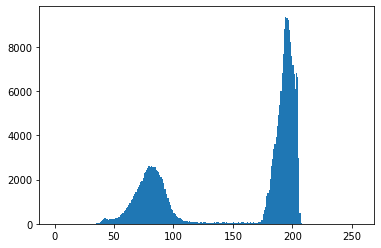

In [34]:
histograma, bins = np.histogram(img_gray, 256, [0, 256])
plt.hist(img_gray.ravel(), 256, [0, 256]);

### **Melhorando a segmentação em uma imagem com ruído (sal e pimenta)**


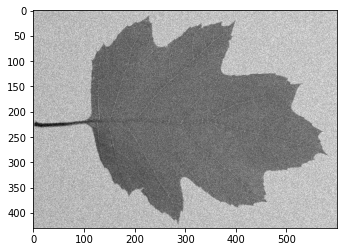

In [36]:
# abrindo uma nova imagem do dataset:
img = cv2.imread('/content/imagens/folha_ruido.jpg')

# realizando a correção dos canais BGR para RGB:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convertendo a imagem para níveis de cinza:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

plt.imshow(img_gray, cmap='gray');

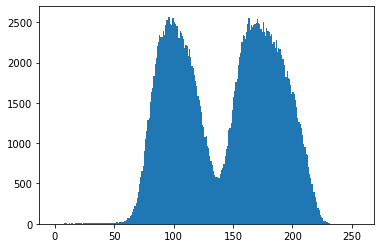

In [37]:
# Plotando o histograma da imagem para observação  da distribuição dos pixels.
histo, bins = np.histogram(img_gray, 256, [0, 256])
plt.hist(img_gray.ravel(), 256, [0, 256]);

Valor do limiar otsu:  139.0


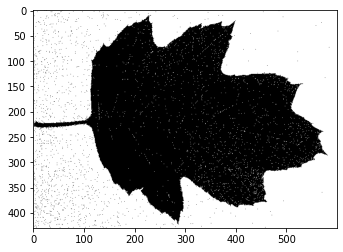

In [67]:
# implementação do método de otsu para a binarização da imagem
k, img_otsu0 = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

print('Valor do limiar otsu: ', k)

plt.imshow(img_otsu0, cmap = 'gray');

Observando a $img\_otsu$ acima, verifica-se que mesmo após o processo de limiarização pelo método de ``Òtsu``, ainda assim existem ruídos significativos na imagem, tornando o processo ineficiente.

Uma das alternativas para a retirada do ruído da imagem é realizar a aplicação de um ``filtro`` ou ``desfoque``.

Para esse proceso será utilizado o ``filtro Gaussian Blur``

 O filtro ``Gaussian Blur`` disponível no ``OpenCV`` segue a seguinte função:

```
dst = cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType=BORDER_DEFAULT]]])
```
Onde:

- ``dst``:  imagem de saída;
- ``src``:  imagem de entrada;
- ``ksize``: tamanho do Kernel Gaussiano $(x, y)$. Onde $x=$ altura e $y=$ largura, que devem ser ímpares e podem ter valores diferentes.
- ``sigmaX``: Desvio padrão do kernel ao longo do eixo $x$ (direção horizontal).
- ``sigmay``: Desvio padrão do kernel ao longo do eixo $y$ (direção vertical). Se $sigmaY=0$, então o valor $sigmaX$ é considerado para $sigmaY$.
- ``borderType``: Especifica os limites da imagem enquanto o kernel é aplicado nas bordas da imagem. 

Fonte: [Gaussian Blurring with OpenCV.](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html)

In [60]:
# Aplicando o filtro Gaussiano com um kernel 5 x 5 e sigmaX = sigma Y = 0.
img_gb = cv2.GaussianBlur(img_gray, (5,5), 0)

In [61]:
# Seguda aplicação do filtro Gaussiano Blur
img_gb1 = cv2.GaussianBlur(img_gb, (5, 5), 0)

In [62]:
# Aplicando o método de Otsu para limiarização após aplicação dupla do filtro Gaussiano
k, img_otsu2 = cv2.threshold(img_gb1, 0, 255, cv2.THRESH_BINARY | cv2. THRESH_OTSU)

print('Valor do limiar otsu: ', k)

Valor do limiar otsu:  139.0


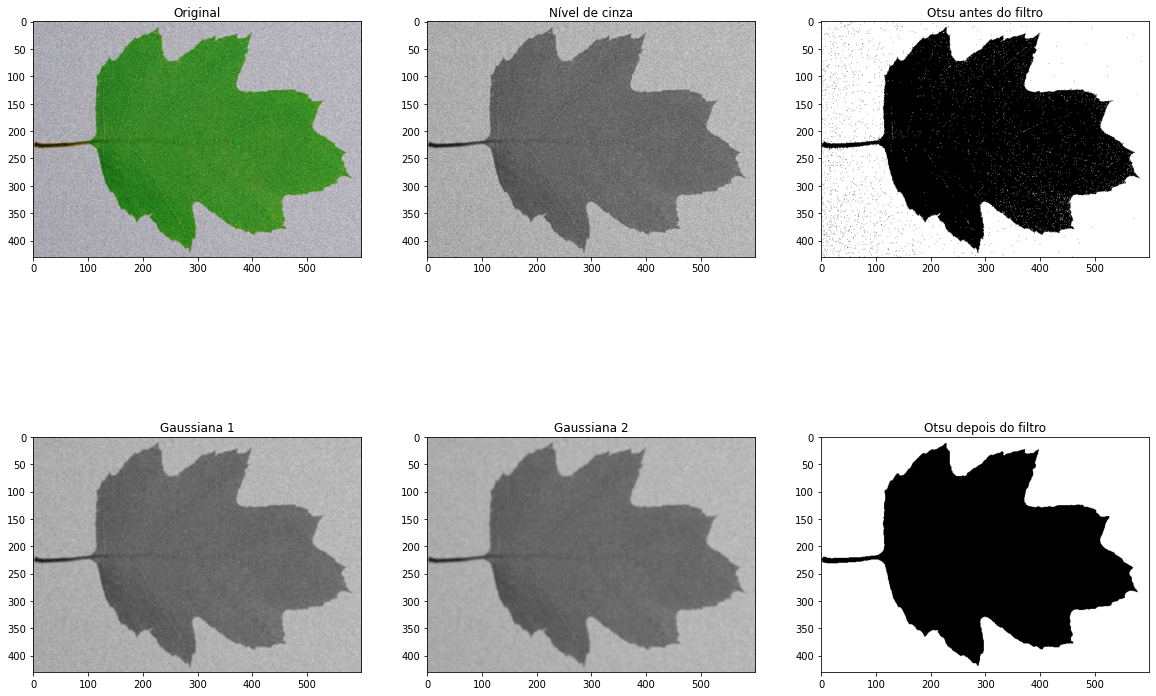

In [68]:
# Ilustração dos resultados obtidos:
imgsArray = [img_rgb, img_gray, img_otsu0, img_gb, img_gb1, img_otsu2]

titlesArray = ['Original', 'Nível de cinza', 'Otsu antes do filtro', 'Gaussiana 1', 'Gaussiana 2', 'Otsu depois do filtro']

showMultipleImages(imgsArray, titlesArray, (20, 14), 3, 2)

Após a aplicação do filtro Gaussiano, observamos através do histograma abaixo que a separação dos píxels em dois grupos distintos ficou mais nítida, diante disso a aplicação da limiarização pelo método de Ótsu se fez realmente eficaz.

Outros filtros serão abordados no notebook relacionado as ``operações morfológicas``.

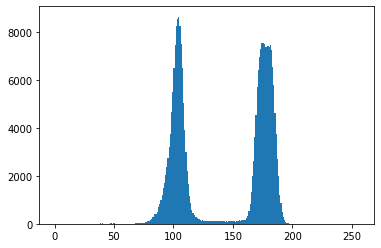

In [59]:
# Plotando o histograma da imagem para observação  da distribuição dos pixels.
histo, bins = np.histogram(img_otsu2, 256, [0, 256])
plt.hist(img_gb1.ravel(), 256, [0, 256]);